In [11]:
import logging

def extract_bar_colors(image_path, num_colors=3, threshold=30):
    """
    Extract the main colors from the bars in a bar chart image,
    excluding black and white (or near-black/near-white) colors.

    Parameters:
        image_path (str): Path to the bar chart image file.
        num_colors (int): Number of distinct bar colors to extract.
        threshold (int): RGB distance threshold to filter black and white colors.

    Returns:
        list: A list of RGB tuples representing the main colors.
    """
    from PIL import Image
    import numpy as np
    from sklearn.cluster import KMeans
    from scipy.stats import mode

    # Set up logging
    logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

    # Open the image and convert it to RGB
    image = Image.open(image_path).convert("RGB")
    logging.info("Image loaded and converted to RGB.")

    # Convert image to numpy array and reshape for clustering
    pixels = np.array(image).reshape(-1, 3)
    logging.info("Image reshaped for clustering.")

    # Apply KMeans to identify dominant colors
    kmeans = KMeans(n_clusters=num_colors, random_state=42).fit(pixels)
    labels = kmeans.labels_
    clusters = kmeans.cluster_centers_.astype(int)
    logging.info("KMeans clustering completed.")

    # Use the most frequent color in each cluster as the representative color
    representative_colors = []
    for i in range(num_colors):
        cluster_pixels = pixels[labels == i]
        most_frequent_color  = [int(mode(cluster_pixels[:, j])[0]) for j in range(3)]
    
        representative_colors.append(most_frequent_color)
    
    logging.info("Representative colors from clusters: %s", representative_colors)

    # Filter out black and white colors
    filtered_colors = []
    for color in representative_colors:
        color = np.array(color, dtype=int).tolist()  # Ensure color is a list of integers
        distance_to_black = np.linalg.norm(np.array(color) - np.array([0, 0, 0]))
        distance_to_white = np.linalg.norm(np.array(color) - np.array([255, 255, 255]))

        if distance_to_black > threshold and distance_to_white > threshold:
            filtered_colors.append(tuple(color))

    logging.info("Filtered colors: %s", filtered_colors)

    return filtered_colors


In [12]:
# import logging

# def extract_bar_colors(image_path, top_colors=3, threshold=30):
#     """
#     Extract the most frequent colors from the bars in a bar chart image,
#     excluding black and white (or near-black/near-white) colors.

#     Parameters:
#         image_path (str): Path to the bar chart image file.
#         top_colors (int): Number of top most frequent colors to extract.
#         threshold (int): RGB distance threshold to filter black and white colors.

#     Returns:
#         list: A list of RGB tuples representing the most frequent colors.
#     """
#     from PIL import Image
#     import numpy as np
#     from collections import Counter

#     # Set up logging
#     logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

#     # Open the image and convert it to RGB
#     image = Image.open(image_path).convert("RGB")
#     logging.info("Image loaded and converted to RGB.")

#     # Convert image to numpy array and reshape for processing
#     pixels = np.array(image).reshape(-1, 3)
#     logging.info("Image reshaped for color counting. Total pixels: %d", pixels.shape[0])

#     # Count the occurrences of each color
#     color_counts = Counter(map(tuple, pixels))
#     logging.info("Color counting completed. Total unique colors: %d", len(color_counts))

#     # Filter out black and white colors
#     filtered_color_counts = {
#         color: count for color, count in color_counts.items()
#         if np.linalg.norm(np.array(color) - np.array([0, 0, 0])) > threshold and \
#            np.linalg.norm(np.array(color) - np.array([255, 255, 255])) > threshold
#     }
#     logging.info("Filtered out black and white colors. Remaining colors: %d", len(filtered_color_counts))

#     # Get the top most frequent colors
#     top_colors_list = sorted(filtered_color_counts.items(), key=lambda x: x[1], reverse=True)[:top_colors]
#     top_colors_rgb = [color for color, _ in top_colors_list]

#     logging.info("Top %d colors: %s", top_colors, top_colors_rgb)

#     return top_colors_rgb

In [13]:
# import logging

# def extract_bar_colors(image_path, top_colors=3, threshold=30, merge_distance=50):
#     """
#     Extract the most frequent colors from the bars in a bar chart image,
#     excluding black and white (or near-black/near-white) colors.
#     Similar colors are merged based on a distance threshold.

#     Parameters:
#         image_path (str): Path to the bar chart image file.
#         top_colors (int): Number of top most frequent colors to extract.
#         threshold (int): RGB distance threshold to filter black and white colors.
#         merge_distance (int): Maximum distance to merge similar colors.

#     Returns:
#         list: A list of RGB tuples representing the most frequent colors.
#     """
#     from PIL import Image
#     import numpy as np
#     from collections import Counter

#     # Set up logging
#     logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

#     # Open the image and convert it to RGB
#     image = Image.open(image_path).convert("RGB")
#     logging.info("Image loaded and converted to RGB.")

#     # Convert image to numpy array and reshape for processing
#     pixels = np.array(image).reshape(-1, 3)
#     logging.info("Image reshaped for color counting. Total pixels: %d", pixels.shape[0])

#     # Count the occurrences of each color
#     color_counts = Counter(map(tuple, pixels))
#     logging.info("Color counting completed. Total unique colors: %d", len(color_counts))

#     # Filter out black and white colors
#     filtered_color_counts = {
#         color: count for color, count in color_counts.items()
#         if np.linalg.norm(np.array(color) - np.array([0, 0, 0])) > threshold and \
#            np.linalg.norm(np.array(color) - np.array([255, 255, 255])) > threshold
#     }
#     logging.info("Filtered out black and white colors. Remaining colors: %d", len(filtered_color_counts))

#     # Merge similar colors based on merge_distance
#     merged_colors = {}
#     for color, count in filtered_color_counts.items():
#         found = False
#         for merged_color in list(merged_colors.keys()):
#             if np.linalg.norm(np.array(color) - np.array(merged_color)) <= merge_distance:
#                 merged_colors[merged_color] += count
#                 found = True
#                 break
#         if not found:
#             merged_colors[color] = count

#     logging.info("Colors merged based on distance. Remaining unique colors: %d", len(merged_colors))

#     # Get the top most frequent colors
#     top_colors_list = sorted(merged_colors.items(), key=lambda x: x[1], reverse=True)[:top_colors]
#     top_colors_rgb = [color for color, _ in top_colors_list]

#     logging.info("Top %d colors: %s", top_colors, top_colors_rgb)

#     return top_colors_rgb

In [14]:
def showcase_colors(colors):
    """
    Display the extracted colors in the terminal.

    Parameters:
        colors (list): A list of RGB tuples representing colors.
    """
    for i, color in enumerate(colors):
        r, g, b = color
        print(f"\033[48;2;{r};{g};{b}m    \033[0m Color {i + 1}: {color}")

In [15]:
# import matplotlib.pyplot as plt
# import numpy as np
# from PIL import Image
# from sklearn.cluster import KMeans

# def extract_bar_colors(image_path, num_colors=3):
#     """
#     Extract the main colors from the bars in a bar chart image.

#     Parameters:
#         image_path (str): Path to the bar chart image file.
#         num_colors (int): Number of distinct bar colors to extract.

#     Returns:
#         list: A list of RGB tuples representing the main colors.
#     """
#     # Open the image and convert it to RGB
#     image = Image.open(image_path).convert("RGB")

#     # Convert image to numpy array
#     img_array = np.array(image)

#     # Reshape the image array for clustering
#     pixels = img_array.reshape(-1, 3)

#     # Apply KMeans to identify dominant colors
#     kmeans = KMeans(n_clusters=num_colors, random_state=42)
#     kmeans.fit(pixels)

#     # Extract the RGB colors of the clusters
#     colors = kmeans.cluster_centers_.astype(int)

#     return [tuple(color) for color in colors]

In [16]:
showcase_colors(((1,2,3),(255,255,255)))

     Color 1: (1, 2, 3)
     Color 2: (255, 255, 255)


In [17]:
# Example usage
# Replace 'image_path' with the path to your bar chart image
image_path = "test_figs/bar_plot_test.jpg"
bar_colors = extract_bar_colors(image_path,  num_colors=4)
# bar_colors = extract_bar_colors(image_path, threshold=15, top_colors=10)
showcase_colors(bar_colors)
print("Filtered Bar Colors:", bar_colors)

2025-01-20 11:29:09,625 - INFO - Image loaded and converted to RGB.
2025-01-20 11:29:09,625 - INFO - Image reshaped for clustering.
2025-01-20 11:29:09,702 - INFO - KMeans clustering completed.
2025-01-20 11:29:09,712 - INFO - Representative colors from clusters: [[254, 254, 254], [27, 165, 0], [0, 4, 237], [248, 1, 0]]
2025-01-20 11:29:09,713 - INFO - Filtered colors: [(27, 165, 0), (0, 4, 237), (248, 1, 0)]


     Color 1: (27, 165, 0)
     Color 2: (0, 4, 237)
     Color 3: (248, 1, 0)
Filtered Bar Colors: [(27, 165, 0), (0, 4, 237), (248, 1, 0)]


Filtered Bars for color (27, 165, 0):
Position: 115, Height: 76
Position: 156, Height: 98
Position: 197, Height: 87
Position: 237, Height: 8
Position: 278, Height: 6
Position: 310, Height: 8
Position: 359, Height: 4
Position: 399, Height: 17
Filtered Bars for color (0, 4, 237):
Position: 127, Height: 70
Position: 168, Height: 96
Position: 208, Height: 88
Position: 249, Height: 9
Position: 309, Height: 8
Position: 370, Height: 4
Position: 409, Height: 15
Filtered Bars for color (248, 1, 0):
Position: 104, Height: 92
Position: 144, Height: 99
Position: 185, Height: 216
Position: 226, Height: 7
Position: 266, Height: 46
Position: 308, Height: 19
Position: 347, Height: 5
Position: 384, Height: 15


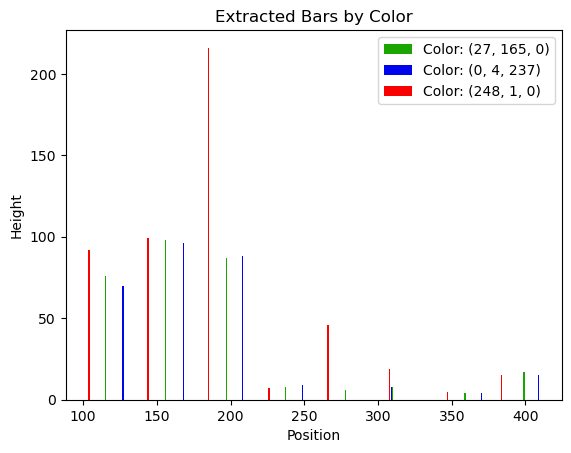

In [18]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Function to extract bar heights and positions from an image of a bar plot
def extract_bars_from_image(image_path, target_color, tolerance=50):
    """
    Extracts bars matching the target color (with a tolerance) from a bar plot image.

    Parameters:
    - image_path: Path to the bar plot image file.
    - target_color: RGB tuple of the color to filter by.
    - tolerance: Tolerance for color matching (default is 50).

    Returns:
    - List of tuples containing (position, height, original_color).
    """
    # Load and process the image
    image = Image.open(image_path).convert("RGB")
    pixels = np.array(image)

    # Calculate the color difference
    def is_color_close(pixel, target_color, tolerance):
        return np.linalg.norm(np.array(pixel) - np.array(target_color)) <= tolerance

    # Create a mask for pixels close to the target color
    mask = np.apply_along_axis(lambda pixel: is_color_close(pixel, target_color, tolerance), -1, pixels)

    # Find bar locations by summing the mask vertically
    bar_positions = mask.any(axis=0)
    bar_heights = mask.sum(axis=0)

    # Extract the heights and original colors of the bars
    bars = [(i, height, tuple(pixels[:, i][mask[:, i]].mean(axis=0).astype(int))) for i, height in enumerate(bar_heights) if height > 0]

    return bars

# Function to merge close bars
def merge_close_bars(filtered_bars, distance_threshold=5):
    """
    Merges bars that are close to each other based on a distance threshold.

    Parameters:
    - filtered_bars: List of tuples (position, height, color) representing the extracted bars.
    - distance_threshold: Maximum distance between bars to consider them as close.

    Returns:
    - List of merged bars as tuples (position, height, color).
    """
    if not filtered_bars:
        return []

    merged_bars = []
    current_group = [filtered_bars[0]]

    for bar in filtered_bars[1:]:
        position, height, color = bar
        if position - current_group[-1][0] <= distance_threshold:
            current_group.append(bar)
        else:
            # Merge the current group
            mid_bar = current_group[len(current_group) // 2]  # Bar in the middle
            merged_bars.append(mid_bar)
            current_group = [bar]

    # Append the last group
    if current_group:
        # mid_bar = current_group[len(current_group) // 2]  # Bar in the middle
        # merged_bars.append(mid_bar)
        highest_bar = max(current_group, key=lambda x: x[1])
        merged_bars.append(highest_bar)

    return merged_bars

# Function to plot the extracted bars
def plot_extracted_bars_multiple(colors_and_bars):
    """
    Plots the bars extracted from the image for multiple colors.

    Parameters:
    - colors_and_bars: List of tuples, each containing a list of bars and their color.
    """
    for bars, color in colors_and_bars:
        if bars:
            positions = [bar[0] for bar in bars]
            heights = [bar[1] for bar in bars]
            normalized_color = np.array(color) / 255

            plt.bar(positions, heights, color=[normalized_color], label=f"Color: {color}")

    plt.title('Extracted Bars by Color')
    plt.xlabel('Position')
    plt.ylabel('Height')
    plt.legend()
    plt.show()

# Example Usage
image_path = "test_figs/bar_plot_test.jpg"
colors = [(27, 165, 0), (0, 4, 237), (248, 1, 0)]  # List of colors to filter
tolerance = 30  # Adjust tolerance as needed

total_bars = []
for color in colors:
    filtered_bars = extract_bars_from_image(image_path, color, tolerance)
    merged_bars = merge_close_bars(filtered_bars, distance_threshold=15)
    total_bars.append((merged_bars, color))

for color, (bars, _) in zip(colors, total_bars):
    print(f"Filtered Bars for color {color}:")
    for position, height, _ in bars:
        print(f"Position: {position}, Height: {height}")

# Plot the merged bars for all colors
plot_extracted_bars_multiple(total_bars)


In [19]:
from matplotlib import pyplot as plt
import cv2
import numpy as np
def find_longest_vertical_line(image_path):
    # Load the image
    img = cv2.imread(image_path)
    
    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply thresholding to binarize the image
    _, binary = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)

    # Find edges using Canny edge detector
    edges = cv2.Canny(binary, 100, 200)

    # Detect lines using Hough Line Transform
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=50, minLineLength=50, maxLineGap=10)

    # Initialize variables to track the longest vertical line
    max_length = 0
    longest_vertical_line = None

    # Loop through all the lines found
    for line in lines:
        for x1, y1, x2, y2 in line:
            # Check if the line is roughly vertical (by checking the difference in x-coordinates)
            if abs(x2 - x1) < 10:  # Allow some tolerance for vertical lines
                # Calculate the length of the vertical line
                length = np.abs(y2 - y1)
                
                # If this is the longest vertical line so far, store it
                if length > max_length:
                    max_length = length
                    longest_vertical_line = (x1, y1, x2, y2)

    # Return the longest vertical line's position and length
    if longest_vertical_line is not None:
        x1, y1, x2, y2 = longest_vertical_line
        return {
            "start": (x1, y1),
            "end": (x2, y2),
            "length": max_length
        }
    else:
        return None

# Test the function
image_path = "test_figs/bar_plot_test.jpg"
longest_vertical_line_info = find_longest_vertical_line(image_path)
longest_vertical_line_info


{'start': (74, 263), 'end': (74, 16), 'length': 247}

In [23]:
max_y_axis = 80
min_y_axis = 0

for color, (bars, _) in zip(colors, total_bars):
    print(f"Calculate value for bar {showcase_colors([color])}:")
    for position, height, _ in bars:
        print(f"Position: {position}, Height: {height}")
        print(f"Value: {((max_y_axis - min_y_axis) / longest_vertical_line_info['length']) * height + min_y_axis}")

     Color 1: (27, 165, 0)
Calculate value for bar None:
Position: 115, Height: 76
Value: 24.615384615384617
Position: 156, Height: 98
Value: 31.74089068825911
Position: 197, Height: 87
Value: 28.178137651821864
Position: 237, Height: 8
Value: 2.591093117408907
Position: 278, Height: 6
Value: 1.9433198380566803
Position: 310, Height: 8
Value: 2.591093117408907
Position: 359, Height: 4
Value: 1.2955465587044535
Position: 399, Height: 17
Value: 5.506072874493928
     Color 1: (0, 4, 237)
Calculate value for bar None:
Position: 127, Height: 70
Value: 22.672064777327936
Position: 168, Height: 96
Value: 31.093117408906885
Position: 208, Height: 88
Value: 28.502024291497975
Position: 249, Height: 9
Value: 2.91497975708502
Position: 309, Height: 8
Value: 2.591093117408907
Position: 370, Height: 4
Value: 1.2955465587044535
Position: 409, Height: 15
Value: 4.8582995951417
     Color 1: (248, 1, 0)
Calculate value for bar None:
Position: 104, Height: 92
Value: 29.79757085020243
Position: 144, He